In [147]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
df = pd.read_csv('csv/SmartCity.csv')

In [149]:
df

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823
2,3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311,839
3,4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171,698
4,5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812,340
...,...,...,...,...,...,...,...,...,...,...,...
97,98,Riga,Latvia,4152,4584,4616,7380,3745,4330,4712,-1760
98,99,Beijing,China,7610,2998,2806,4905,5183,1980,4449,-2023
99,100,St Petersburg,Russia,4588,2908,3622,4515,5390,4100,4191,-2281
100,101,Calgary,Canada,6675,4052,5946,8022,6424,8657,6678,206


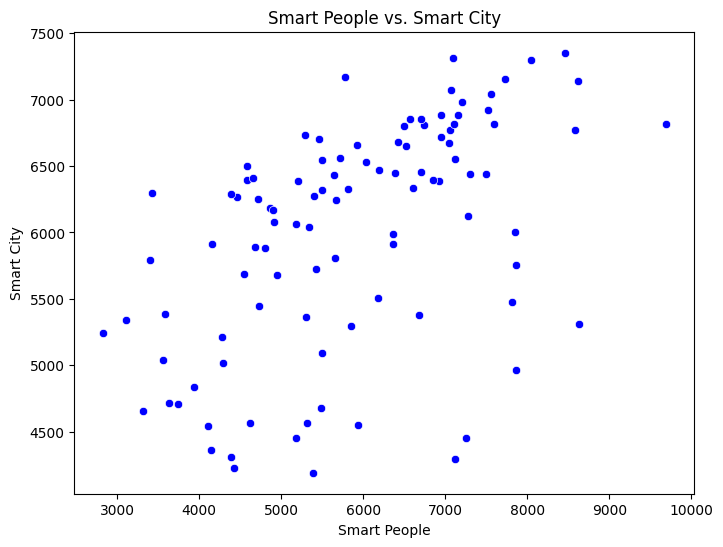

In [165]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Smart_People"], y=df["SmartCity_Index"], color="blue")
plt.xlabel("Smart People")
plt.ylabel("Smart City")
plt.title("Smart People vs. Smart City")
plt.show()

In [151]:
df = df[["Smart_People", "SmartCity_Index"]]

In [152]:
df

,Smart_People,SmartCity_Index
0,8618,7138
1,8050,7296
2,7098,7311
3,5780,7171
4,6743,6812
...,...,...
97,3745,4712
98,5183,4449
99,5390,4191
100,6424,6678


In [153]:
X = df["Smart_People"]
y = df["SmartCity_Index"]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [155]:
X_train

11     7558
74     7125
4      6743
68     5425
100    6424
       ... 
31     4660
54     6388
73     4955
40     5463
83     5503
Name: Smart_People, Length: 71, dtype: int64

In [156]:
X_train = np.array(X_train).reshape(-1,1)
X_train

array([[7558],
       [7125],
       [6743],
       [5425],
       [6424],
       [3560],
       [6955],
       [7200],
       [7075],
       [4158],
       [7523],
       [7098],
       [5188],
       [7595],
       [4143],
       [7260],
       [4280],
       [4810],
       [4618],
       [5818],
       [4468],
       [3313],
       [5848],
       [8618],
       [6703],
       [6930],
       [3745],
       [5208],
       [6610],
       [6185],
       [6955],
       [5500],
       [5650],
       [7050],
       [4423],
       [3403],
       [5675],
       [5495],
       [8050],
       [4920],
       [6503],
       [5930],
       [3938],
       [3425],
       [4723],
       [7725],
       [7855],
       [8635],
       [7305],
       [4590],
       [7158],
       [2825],
       [6680],
       [5933],
       [5300],
       [6363],
       [6360],
       [7065],
       [6853],
       [8580],
       [4678],
       [6703],
       [5315],
       [5715],
       [4298],
       [3108],
       [46

In [157]:
X_test = np.array(X_test).reshape(-1,1)
X_test

array([[5398],
       [3580],
       [4385],
       [7123],
       [5485],
       [5340],
       [7860],
       [7285],
       [5660],
       [3635],
       [4868],
       [4548],
       [5390],
       [5293],
       [7105],
       [7815],
       [4385],
       [5780],
       [4590],
       [7498],
       [6528],
       [7858],
       [8465],
       [6040],
       [6573],
       [4730],
       [4908],
       [4113],
       [5183],
       [6200],
       [9695]])

In [158]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [159]:
print(f"Intercept (b): {model.intercept_:.2f}")  # No indexing needed
print(f"Coefficient (m): {model.coef_[0]:.2f}")  # Use [0] to extract number

Intercept (b): 4190.16
Coefficient (m): 0.31


In [160]:
Y_pred = model.predict(X_test)

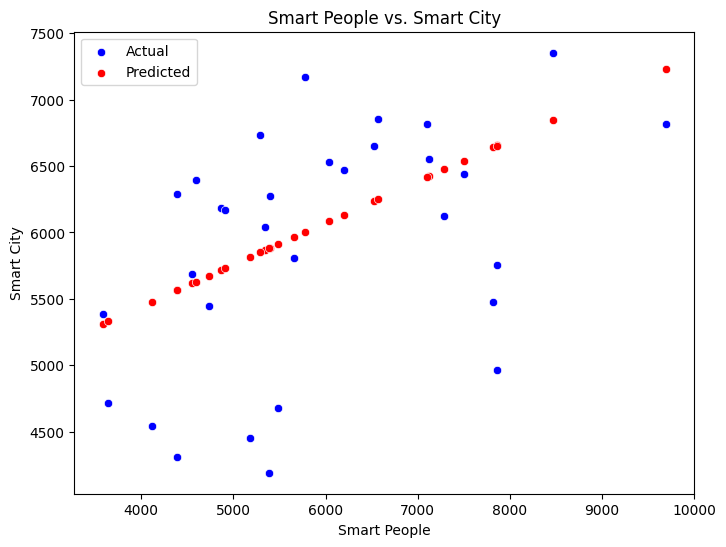

In [166]:
plt.figure(figsize=(8,6))

# Scatter plot of actual salaries
sns.scatterplot(x=X_test.flatten(), y=y_test.values.flatten(), color="blue", label="Actual")

# Scatter plot of predicted salaries
sns.scatterplot(x=X_test.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

plt.xlabel("Smart People")
plt.ylabel("Smart City")
plt.title("Smart People vs. Smart City")
plt.legend()
plt.show()

In [163]:
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 632722.44
R² Score: 0.17


In [164]:
salary_variance = np.var(y_test)
print(f"Salary Variance: {salary_variance:.2f}")


Salary Variance: 762909.83
